Calculated Fan Speed: 85.00%


C:\Users\USER\AppData\Local\Temp\ipykernel_14708\195388935.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return (x - a) / (b - a)


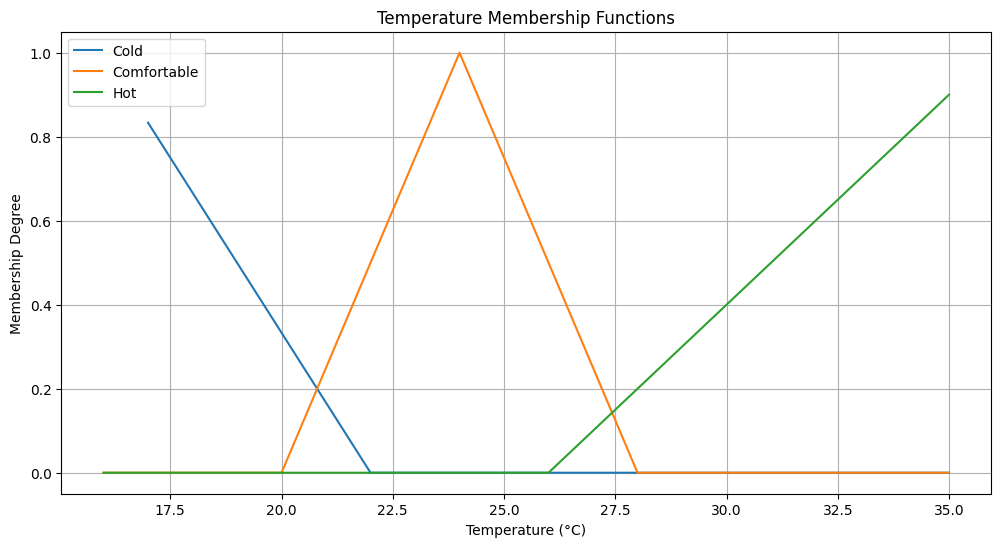

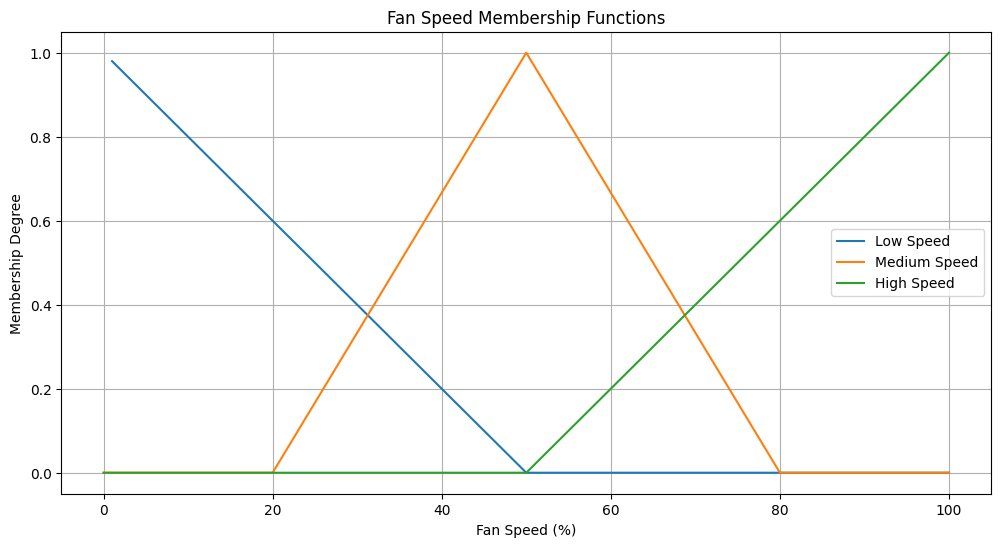

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define fuzzy variables for Tsukamoto Method
class FuzzyVariable:
    def __init__(self, name, universe, membership_functions):
        self.name = name
        self.universe = universe
        self.membership_functions = membership_functions

    def fuzzify(self, value):
        memberships = {}
        for label, func in self.membership_functions.items():
            memberships[label] = func(value)
        return memberships

# Membership functions for triangular shapes
def triangular(a, b, c):
    def func(x):
        if a <= x <= b:
            return (x - a) / (b - a)
        elif b <= x <= c:
            return (c - x) / (c - b)
        return 0
    return func

# Define input and output variables
temperature = FuzzyVariable(
    "temperature",
    universe=np.arange(16, 36, 1),
    membership_functions={
        "cold": triangular(16, 16, 22),
        "comfortable": triangular(20, 24, 28),
        "hot": triangular(26, 36, 36),
    },
)

fan_speed = FuzzyVariable(
    "fan_speed",
    universe=np.arange(0, 101, 1),
    membership_functions={
        "low": triangular(0, 0, 50),
        "medium": triangular(20, 50, 80),
        "high": triangular(50, 100, 100),
    },
)

# Define rules for Tsukamoto method
rules = [
    ("cold", "low"),
    ("comfortable", "medium"),
    ("hot", "high"),
]

def apply_rule(temperature_value, rule):
    temp_level, fan_speed_level = rule

    temp_membership = temperature.fuzzify(temperature_value)[temp_level]
    firing_strength = temp_membership

    if firing_strength > 0:
        fan_speed_value = defuzzify(fan_speed_level, firing_strength)
        return firing_strength, fan_speed_value
    return 0, 0

def defuzzify(level, firing_strength):
    if level == "low":
        return 25 + (25 * firing_strength)
    elif level == "medium":
        return 50 + (25 * firing_strength)
    elif level == "high":
        return 75 + (25 * firing_strength)
    return 0

def tsukamoto(temperature_value):
    weighted_sum = 0
    total_firing_strength = 0

    for rule in rules:
        firing_strength, value = apply_rule(temperature_value, rule)
        weighted_sum += firing_strength * value
        total_firing_strength += firing_strength

    return weighted_sum / total_firing_strength if total_firing_strength > 0 else 0

# Example: Simulate for a room temperature of 30°C
result = tsukamoto(30)
print(f"Calculated Fan Speed: {result:.2f}%")

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(temperature.universe, [temperature.fuzzify(x)["cold"] for x in temperature.universe], label="Cold")
plt.plot(temperature.universe, [temperature.fuzzify(x)["comfortable"] for x in temperature.universe], label="Comfortable")
plt.plot(temperature.universe, [temperature.fuzzify(x)["hot"] for x in temperature.universe], label="Hot")
plt.title("Temperature Membership Functions")
plt.xlabel("Temperature (°C)")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(fan_speed.universe, [fan_speed.fuzzify(x)["low"] for x in fan_speed.universe], label="Low Speed")
plt.plot(fan_speed.universe, [fan_speed.fuzzify(x)["medium"] for x in fan_speed.universe], label="Medium Speed")
plt.plot(fan_speed.universe, [fan_speed.fuzzify(x)["high"] for x in fan_speed.universe], label="High Speed")
plt.title("Fan Speed Membership Functions")
plt.xlabel("Fan Speed (%)")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid()
plt.show()